In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../datasets/movie_metadata.csv')

In [4]:
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
# Shape of the dataset
print(f'Data contains: \n rows :{data.shape[0]} \n columns :{data.shape[1]}');

Data contains: 
 rows :5043 
 columns :28


In [6]:
# Let's look at the column names
print(f'Columns names are: \n {data.columns.tolist()}')

Columns names are: 
 ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


Let's see the year distribution of movies

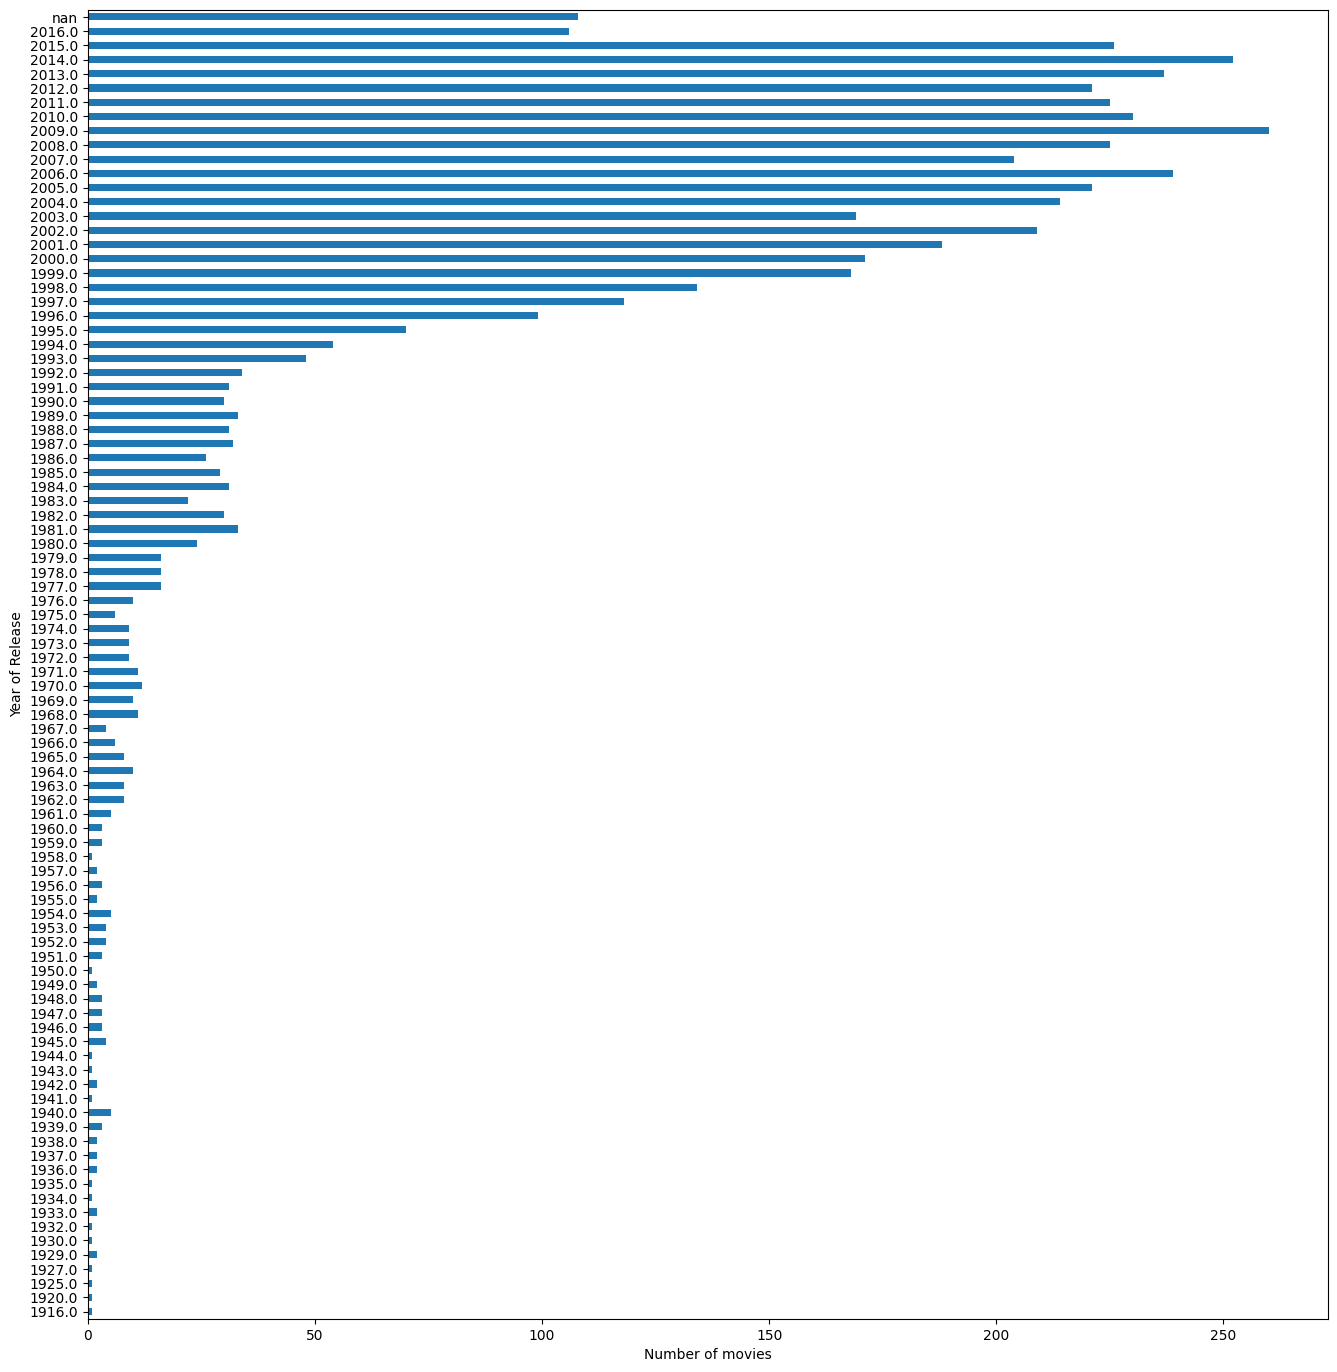

In [7]:
import matplotlib.pyplot as plt

data['title_year'].value_counts(dropna=False).sort_index().plot(kind = 'barh', xlabel = 'Number of movies', ylabel = 'Year of Release',figsize=(16,17))
plt.show();

Hence we only have movies uptil 2016

Only include those columns which will be considered while making recommendations , i.e :
1. Director's name
2. Actor's name
3. Genres
4. Movie Title

In [8]:
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [9]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [10]:
# looking for missing values
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

Replacing missing values with 'unknown'

In [11]:
data['director_name'].replace(np.nan,'unknown', inplace = True)
data['actor_1_name'].replace(np.nan,'unknown', inplace = True)
data['actor_2_name'].replace(np.nan,'unknown', inplace = True)
data['actor_3_name'].replace(np.nan,'unknown', inplace = True)
data['genres'].replace(np.nan,'unknown', inplace = True)
data['movie_title'].replace(np.nan,'unknown', inplace = True)

In [12]:
data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [13]:
data.dtypes

director_name    object
actor_1_name     object
actor_2_name     object
actor_3_name     object
genres           object
movie_title      object
dtype: object

In [14]:
# converting movie title into lower characters
data['movie_title'] = data['movie_title'].str.lower()

In [15]:
# in movie_title we have null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [16]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [17]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [18]:
data['comb'] = data['actor_1_name'] + ' ' + data['actor_2_name'] + ' '+ data['actor_3_name'] + ' '+ data['director_name'] +' ' + data['genres']

In [19]:
# saving the preprocessed data
data.to_csv('../datasets/data.csv',index= False)

In [20]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott S...
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknow...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benja...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsi...
